In [139]:
import csv
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [140]:
# should be removed
# hardcoded real values for each log

#100
precision_100 = [0.9999999999999997, 0.9999999999999997, 1.0000000000000013, 0.9999999999999984, 0.9065081180452204, 1.0, 0.9999999999999989, 1.0000000000000016, 0.8566748838545033, 0.0, 0.0]
recall_100 = [1.0000000000000002, 0.867310711401268, 1.0000000000000018, 0.7301791264864491, 0.7301791264864489, 0.8673107114012669, 0.8676980680503138, 0.7301791264864494, 0.6356578498698507, 0.0, 0.0]
    
# 1000
precision_1000 = [0.9999999999999982, 1.0000000000000007, 1.000000000000001, 1.0000000000000002, 0.9999999999999984, 0.9999999999999998, 0.9999999999999984, 1.0000000000000007, 1.0]
recall_1000 = [0.8673107114012659, 0.7301791264864496, 0.7301791264864512, 0.8673107114012679, 0.7301791264864503, 0.7301791264864484, 0.7301791264864493, 0.7301791264864517, 0.6356578498698489]

# 10,000
precision_10000 = [1.000000000000002, 0.9999999999999986, 0.9999999999999992, 0.9999999999999966, 1.000000000000001, 1.000000000000001, 0.9999999999999984, 1.0000000000000022, 0.9999999999999997]
recall_10000 = [0.8673107114012658, 0.8673107114012679, 0.7301791264864482, 0.7301791264864468, 0.730179126486449, 0.7301791264864506, 0.7301791264864499, 0.7301791264864507, 0.7301791264864488]

# 100,000
precision_100000 = [0.9999999999999992, 0.999999999999999, 0.9999999999999997, 1.0000000000000002, 0.9999999999999998, 1.0000000000000002, 1.0000000000000016, 0.999999999999999, 0.9999999999999979]
recall_100000 = [0.8673107114012664, 0.8673107114012666, 0.7301791264864488, 0.7301791264864498, 0.7301791264864496, 0.7301791264864504, 0.7301791264864506, 0.7301791264864479, 0.7301791264864504]
    
# 1,000,000
precision_1000000 = [0.9999999999999999, 0.9999999999999997, 1.0000000000000007, 1.0000000000000007, 0.999999999999999, 1.000000000000001, 1.0000000000000002, 1.0000000000000002, 1.0000000000000009]
recall_1000000 = [0.8673107114012677, 0.8673107114012668, 0.7301791264864502, 0.7301791264864507, 0.730179126486449, 0.7301791264864494, 0.7301791264864491, 0.7301791264864484, 0.7301791264864493]

In [141]:
# should be removed
# create a csv file containing all the real values

csv_precision = "/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/real-precision.csv"
csv_recall = "/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/real-recall.csv"

# Open the CSV file for writing
with open(csv_precision, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the float_array to the CSV file
    writer.writerow(precision_100)
    writer.writerow(precision_1000)
    writer.writerow(precision_10000)
    writer.writerow(precision_100000)
    writer.writerow(precision_1000000)
    
# Open the CSV file for writing
with open(csv_recall, mode='w', newline='') as file:
    writer = csv.writer(file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    
    # Write the float_array to the CSV file
    writer.writerow(recall_100)
    writer.writerow(recall_1000)
    writer.writerow(recall_10000)
    writer.writerow(recall_100000)
    writer.writerow(recall_1000000)

In [142]:
# read the real recall and precision values and store in arrays

precision_100 = []
precision_1000 = []
precision_10000 = []
precision_100000 = []
precision_1000000 = []

# Open the CSV file for reading
with open('/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/real-precision.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Iterate through the rows and store them in the respective arrays
    for i, row in enumerate(csvreader):
        if i == 0:
            precision_100 = [float(x) for x in row]
        elif i == 1:
            precision_1000 = [float(x) for x in row]
        elif i == 2:
            precision_10000 = [float(x) for x in row]
        elif i == 3:
            precision_100000 = [float(x) for x in row]
        elif i == 4:
            precision_1000000 = [float(x) for x in row]
            
recall_100 = []
recall_1000 = []
recall_10000 = []
recall_100000 = []
recall_1000000 = []

# Open the CSV file for reading
with open('/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/real-recall.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    
    # Iterate through the rows and store them in the respective arrays
    for i, row in enumerate(csvreader):
        if i == 0:
            recall_100 = [float(x) for x in row]
        elif i == 1:
            recall_1000 = [float(x) for x in row]
        elif i == 2:
            recall_10000 = [float(x) for x in row]
        elif i == 3:
            recall_100000 = [float(x) for x in row]
        elif i == 4:
            recall_1000000 = [float(x) for x in row]

In [166]:
# calculate precision and recall for log-size 100

precision_means_100 = []
precision_confidences_upper_100 = []
precision_confidences_lower_100 = []
recall_means_100 = []
recall_confidences_upper_100 = []
recall_confidences_lower_100 = []
for i in range(11):
    precision_results = []
    recall_results = []
    with open('/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/output100-' + str(i).zfill(2) + '.csv', 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        
        for row in csvreader:
            if len(row) >= 1:
                precision_value = float(row[0])
                recall_value = float(row[1])

                precision_results.append(abs(precision_100[i] - precision_value))
                recall_results.append(abs(recall_100[i] - recall_value))

    precision_mean = np.mean(precision_results)
    precision_sem = stats.sem(precision_results)
    recall_mean = np.mean(recall_results)
    recall_sem = stats.sem(recall_results)
    precision_confidence_interval = stats.t.interval(0.95, len(precision_results) - 1, loc=precision_mean, scale=precision_sem)
    recall_confidence_interval = stats.t.interval(0.95, len(recall_results) - 1, loc=recall_mean, scale=recall_sem)
    print(precision_confidence_interval)
    print(recall_confidence_interval)
    precision_means_100.append(precision_mean)
    precision_confidences_lower_100.append(precision_confidence_interval[0])
    precision_confidences_upper_100.append(precision_confidence_interval[1])
    recall_means_100.append(recall_mean)
    recall_confidences_lower_100.append(recall_confidence_interval[0])
    recall_confidences_upper_100.append(recall_confidence_interval[1])
    
print(precision_means)

(0.062038590861444615, 0.062366975422115084)
(8.58655187902662e-05, 0.000234075595602486)
(0.02448233014763069, 0.025530822254990496)
(0.11149375764401151, 0.11274245540506247)
(0.06870336990271102, 0.06926360113137968)
(0.3254717963081585, 0.32692607976298615)
(1.4944914821724358e-15, 1.6585419077630086e-15)
(0.19030891647055181, 0.19113924425664647)
(0.09349188195477959, 0.09349188195477978)
(0.1759186593745086, 0.17635474574322837)
(0.029189728944471048, 0.03178245395517552)
(0.2971882442806295, 0.3059147763207146)
(0.041479385839801625, 0.04310283363214534)
(0.32600873863898616, 0.32743557342692575)
(1.4109712921584129e-15, 1.5644264138370067e-15)
(0.28580476921142717, 0.2860843699843263)
(0.14332511614549656, 0.14332511614549695)
(0.19598377703456957, 0.19645009148144857)
(0.9999999999999999, 1.0000000000000002)
(0.3733626268305988, 0.3734227638382254)
(0.9999999999999999, 1.0)
(0.3750999329812685, 0.3757821895476033)
[0.029425570918913402, 0.029252856967194475, 1.1435297153639113

In [148]:
precision_means_1000 = []
precision_confidences_upper_1000 = []
precision_confidences_lower_1000 = []
recall_means_1000 = []
recall_confidences_upper_1000 = []
recall_confidences_lower_1000 = []
for i in range(9):
    precision_results = []
    recall_results = []
    with open('/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/output1000-0' + str(i) + '.csv', 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        
        for row in csvreader:
            if len(row) >= 1:
                precision_value = float(row[0])
                recall_value = float(row[1])

                precision_results.append(abs(precision[i] - precision_value))
                recall_results.append(abs(recall[i] - recall_value))

    precision_mean = np.mean(precision_results)
    precision_sem = stats.sem(precision_results)
    recall_mean = np.mean(recall_results)
    recall_sem = stats.sem(recall_results)
    precision_confidence_interval = stats.t.interval(0.95, len(precision_results) - 1, loc=precision_mean, scale=precision_sem)
    recall_confidence_interval = stats.t.interval(0.95, len(recall_results) - 1, loc=recall_mean, scale=recall_sem)
    precision_means_1000.append(precision_mean)
    precision_confidences_lower_1000.append(precision_confidence_interval[0])
    precision_confidences_upper_1000.append(precision_confidence_interval[1])
    recall_means_1000.append(recall_mean)
    recall_confidences_lower_1000.append(recall_confidence_interval[0])
    recall_confidences_upper_1000.append(recall_confidence_interval[1])

In [153]:
precision_means_10000 = []
precision_confidences_upper_10000 = []
precision_confidences_lower_10000 = []
recall_means_10000 = []
recall_confidences_upper_10000 = []
recall_confidences_lower_10000 = []
for i in range(9):
    precision_results = []
    recall_results = []
    with open('/Users/anandik/Documents/GR/Code/BootstrapGeneralizationBasic_GR/src/main/java/org/bootstrap/resources/output10000-0' + str(i) + '.csv', 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        
        for row in csvreader:
            if len(row) >= 1:
                precision_value = float(row[0])
                recall_value = float(row[1])

                precision_results.append(abs(precision[i] - precision_value))
                recall_results.append(abs(recall[i] - recall_value))

    precision_mean = np.mean(precision_results)
    precision_sem = stats.sem(precision_results)
    recall_mean = np.mean(recall_results)
    recall_sem = stats.sem(recall_results)
    precision_confidence_interval = stats.t.interval(0.95, len(precision_results) - 1, loc=precision_mean, scale=precision_sem)
    recall_confidence_interval = stats.t.interval(0.95, len(recall_results) - 1, loc=recall_mean, scale=recall_sem)
    precision_means_10000.append(precision_mean)
    precision_confidences_lower_10000.append(precision_confidence_interval[0])
    precision_confidences_upper_10000.append(precision_confidence_interval[1])
    recall_means_10000.append(recall_mean)
    recall_confidences_lower_10000.append(recall_confidence_interval[0])
    recall_confidences_upper_10000.append(recall_confidence_interval[1])
print(precision_confidences_lower_10000)
print(precision_confidences_upper_10000)

[0.02904521303939589, 0.02862173843644133, 1.0681847463420384e-15, 2.0803184549732524e-16, 1.5068128221489029e-15, 1.1441861704987877e-16, 1.4894656099769463e-15, 6.012871902768211e-16, 1.2330831736618704e-17]
[0.029805928798430914, 0.029883975497947617, 1.2188746843857842e-15, 2.5826182484524052e-16, 1.6240161072940385e-15, 1.9644382984516504e-16, 1.619158858973492e-15, 7.309804392733667e-16, 1.431003917109032e-16]


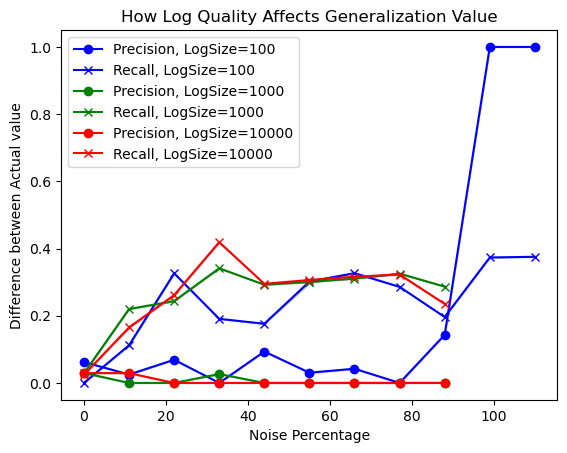

In [156]:
# Create x values (assuming a simple linear sequence)
x_values = []

for x in range(11):
    x_values.append(x*11)

plt.plot(x_values[:11], precision_means_100, marker='o', linestyle='-', color='b', label='Precision, LogSize=100')
plt.fill_between(x_values[:11], precision_confidences_lower_100, precision_confidences_upper_100, color='gray', alpha=0.5)
plt.plot(x_values[:11], recall_means_100, marker='x', linestyle='-', color='b', label='Recall, LogSize=100')
plt.fill_between(x_values[:11], recall_confidences_lower_100, recall_confidences_upper_100, color='gray', alpha=0.5)
plt.plot(x_values[:9], precision_means_1000, marker='o', linestyle='-', color='g', label='Precision, LogSize=1000')
plt.fill_between(x_values[:9], precision_confidences_lower_1000, precision_confidences_upper_1000, color='gray', alpha=0.5)
plt.plot(x_values[:9], recall_means_1000, marker='x', linestyle='-', color='g', label='Recall, LogSize=1000')
plt.fill_between(x_values[:9], recall_confidences_lower_1000, recall_confidences_upper_1000, color='gray', alpha=0.5)
plt.plot(x_values[:9], precision_means_10000, marker='o', linestyle='-', color='r', label='Precision, LogSize=10000')
plt.fill_between(x_values[:9], precision_confidences_lower_10000, precision_confidences_upper_10000, color='gray', alpha=0.5)
plt.plot(x_values[:9], recall_means_10000, marker='x', linestyle='-', color='r', label='Recall, LogSize=10000')
plt.fill_between(x_values[:9], recall_confidences_lower_10000, recall_confidences_upper_10000, color='gray', alpha=0.5)

# Add labels and a legend
plt.xlabel('Noise Percentage')
plt.ylabel('Difference between Actual value')
plt.title('How Log Quality Affects Generalization Value')
plt.legend()

# Show the chart
plt.show()


In [158]:
latex_code = "\\begin{tabular}{|c|c|c|}\n"
latex_code += "\\hline\n"
    
# Header row
latex_code += "Log Size & Noise Percentage & Real Precision & Calculated Precision & Difference & Real Recall & Calculated Recall & Difference \\\\\n"
latex_code += "\\hline\n"
    
# Iterate through the data
data = [100, 1000, 10000]
for row in data:
    latex_code += "\\multirow{10}{*}{" + row[0] + "} & " + row[1] + " & " + str(row[2]) + " \\\\\n"
    latex_code += "& & \\\\\n"  # Empty line after multirow

for i in range(4):
    latex_code += "\\multirow{10}"
        
# End the tabular environment
latex_code += "\\hline\n"
latex_code += "\\end{tabular}"

print(latex_code)

\begin{tabular}{|c|c|c|}
\hline
Name & Subject & Score \\
\hline
\multirow{2}{*}{\multirow{2}{*}{Group 1}} & Item 1 & 10 \\
& & \\
\multirow{2}{*}{} & Item 2 & 15 \\
& & \\
\multirow{2}{*}{\multirow{2}{*}{Group 2}} & Item 3 & 12 \\
& & \\
\multirow{2}{*}{} & Item 4 & 18 \\
& & \\
\hline
\end{tabular}


In [165]:
import numpy as np

print(precision_100)
print(precision_means_100)
print(np.array(precision_confidences_upper_100) - np.array(precision_means_100))

[0.9999999999999997, 0.9999999999999997, 1.0000000000000013, 0.9999999999999984, 0.9065081180452204, 1.0, 0.9999999999999989, 1.0000000000000016, 0.8566748838545033, 0.0, 0.0]
[0.06220278314177985, 0.025006576201310592, 0.06898348551704535, 1.5765166949677222e-15, 0.09349188195477968, 0.030486091449823283, 0.042291109735973484, 1.4876988529977098e-15, 0.14332511614549676, 1.0, 1.0]
[1.64192280e-04 5.24246054e-04 2.80115614e-04 8.20252128e-17
 9.71445147e-17 1.29636251e-03 8.11723896e-04 7.67275608e-17
 1.94289029e-16 2.22044605e-16 0.00000000e+00]
